# Introduce Dataset

In [1]:
import pandas as pd

In [2]:
#load dataset from NYC OpenData, saved in Downloads, then uploaded to Jupyter Notebook
df=pd.read_csv('HIV_AIDS_Diagnoses_by_Neighborhood__Age_Group__and_Race_Ethnicity_20240516.csv')

In [3]:
#Display the first few rows of the dataset to verify it was imported correctly
df.head()

,YEAR,NEIGHBORHOOD,RACE/ETHNICITY,AGE,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION",Borough
0,2013,High Bridge - Morrisania,Native American,30 - 39,0,0,0,0,0,0,NaN
1,2010,East Harlem,Unknown,40 - 49,0,NaN,0,NaN,0,NaN,NaN
2,2011,High Bridge - Morrisania,Unknown,40 - 49,0,NaN,0,NaN,0,NaN,NaN
3,2012,Greenwich Village - SoHo,Native American,50 - 59,0,0,0,0,0,0,NaN
4,2011,Long Island City - Astoria,Multiracial,20 - 29,0,0,0,0,0,0,NaN


# Data Overview

In [4]:
#Exploratory Data Analysis (EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21036 entries, 0 to 21035
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   YEAR                                                                 21036 non-null  int64 
 1   NEIGHBORHOOD                                                         21036 non-null  object
 2   RACE/ETHNICITY                                                       21036 non-null  object
 3   AGE                                                                  21036 non-null  object
 4   TOTAL NUMBER OF HIV DIAGNOSES                                        20935 non-null  object
 5   HIV DIAGNOSES PER 100,000 POPULATION                                 19559 non-null  object
 6   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        21011 non-null  object
 7   PROPORTION OF

# Data Cleansing

In [5]:
#Checking for Missing Values
missing_values=df.isnull().sum()

In [6]:
missing_values

YEAR                                                                      0
NEIGHBORHOOD                                                              0
RACE/ETHNICITY                                                            0
AGE                                                                       0
TOTAL NUMBER OF HIV DIAGNOSES                                           101
HIV DIAGNOSES PER 100,000 POPULATION                                   1477
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                            25
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    7464
TOTAL NUMBER OF AIDS DIAGNOSES                                           76
AIDS DIAGNOSES PER 100,000 POPULATION                                  1452
Borough                                                                8604
dtype: int64

# Removing invalid values

Replaced and dropped rows where the columns for race/ethnicity,age, or borough have the value 'All'. Please note these entries might represent the aggregate totals for all subcategories within these groups, which could result in double counting. To maintain data accuracy and integriy, the 'All' values were exlcuded, this ensures the precision and relevance of our analysis, ensuring that our conclusions are based on detailed and specific data points.

In [7]:
#Replace invalid values
unwanted_values=['*','NA','All']


In [8]:
df_updated=pd.read_csv('HIV_AIDS_Diagnoses_by_Neighborhood__Age_Group__and_Race_Ethnicity_20240516.csv',na_values=unwanted_values)

In [9]:
df_updated

,YEAR,NEIGHBORHOOD,RACE/ETHNICITY,AGE,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION",Borough
0,2013,High Bridge - Morrisania,Native American,30 - 39,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2010,East Harlem,Unknown,40 - 49,0.0,NaN,0.0,NaN,0.0,NaN,NaN
2,2011,High Bridge - Morrisania,Unknown,40 - 49,0.0,NaN,0.0,NaN,0.0,NaN,NaN
3,2012,Greenwich Village - SoHo,Native American,50 - 59,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2011,Long Island City - Astoria,Multiracial,20 - 29,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
21031,2021,Willowbrook,Black,60+,0.0,0.0,0.0,NaN,0.0,0.0,Staten\nIsland
21032,2021,Willowbrook,Latino/Hispanic,60+,0.0,0.0,0.0,NaN,0.0,0.0,Staten\nIsland
21033,2021,Willowbrook,Other/Unknown,60+,0.0,0.0,0.0,NaN,NaN,NaN,Staten\nIsland
21034,2021,Willowbrook,White,60+,0.0,0.0,0.0,NaN,1.0,5.6,Staten\nIsland


In [10]:
#Remove invalid value'NaN'
df_updated.dropna(inplace=True)


In [11]:
#Checking for Missing Values
after_drop_unwanted=df_updated.isnull().sum()

In [12]:
after_drop_unwanted

YEAR                                                                   0
NEIGHBORHOOD                                                           0
RACE/ETHNICITY                                                         0
AGE                                                                    0
TOTAL NUMBER OF HIV DIAGNOSES                                          0
HIV DIAGNOSES PER 100,000 POPULATION                                   0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0
TOTAL NUMBER OF AIDS DIAGNOSES                                         0
AIDS DIAGNOSES PER 100,000 POPULATION                                  0
Borough                                                                0
dtype: int64

# Check for unique values for each column

In [13]:
#Check Year
df_updated['YEAR'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [14]:
#Check Neighborhood
df_updated['NEIGHBORHOOD'].unique()

array(['Crotona - Tremont', 'Fordham - Bronx Park',
       'High Bridge - Morrisania', 'Hunts Point - Mott Haven',
       'Kingsbridge - Riverdale', 'Northeast Bronx',
       'Pelham - Throgs Neck', 'Bedford Stuyvesant -\nCrown Heights',
       'Bensonhurst - Bay Ridge', 'Borough Park', 'Canarsie - Flatlands',
       'Coney Island -\nSheepshead Bay',
       'Downtown - Heights -\nPark Slope', 'East Flatbush - Flatbush',
       'East New York', 'Greenpoint', 'Sunset Park',
       'Williamsburg - Bushwick', 'Central Harlem -\nMorningside Heights',
       'Chelsea - Clinton', 'East Harlem', 'Gramercy Park - Murray\nHill',
       'Greenwich Village - Soho', 'Lower Manhattan',
       'Union Square - Lower\nEast Side', 'Upper East Side',
       'Upper West Side', 'Washington Heights -\nInwood',
       'Bayside - Little Neck', 'Flushing - Clearview', 'Fresh Meadows',
       'Jamaica', 'Long Island City - Astoria',
       'Ridgewood - Forest Hills', 'Rockaway', 'Southeast Queens',
       'Sout

In [15]:
#Check RACE/ETHNICITY 
df_updated['RACE/ETHNICITY'].unique()

array(['Black', 'Latino/Hispanic', 'White', 'Asian/Pacific\nIslander',
       'Other/Unknown'], dtype=object)

In [16]:
#Check AGE  
df_updated['AGE'].unique()

array(['13 -\n19', '20 -\n29', '30 -\n39', '40 -\n49', '50 -\n59', '60+'],
      dtype=object)

In [17]:
#Check BOROUGH   
df_updated['Borough'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten\nIsland'],
      dtype=object)

In [18]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3231 entries, 8680 to 21026
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YEAR                                                                 3231 non-null   int64  
 1   NEIGHBORHOOD                                                         3231 non-null   object 
 2   RACE/ETHNICITY                                                       3231 non-null   object 
 3   AGE                                                                  3231 non-null   object 
 4   TOTAL NUMBER OF HIV DIAGNOSES                                        3231 non-null   float64
 5   HIV DIAGNOSES PER 100,000 POPULATION                                 3231 non-null   float64
 6   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                        3231 non-null   float64
 7   PROPORT

# Data conversion

In [19]:
df_updated['RACE/ETHNICITY']=df_updated['RACE/ETHNICITY'].astype('category')

In [20]:
df_updated['Borough']=df_updated['Borough'].astype('category')

In [21]:
#Review Data Types after conversion 
df_updated.dtypes

YEAR                                                                      int64
NEIGHBORHOOD                                                             object
RACE/ETHNICITY                                                         category
AGE                                                                      object
TOTAL NUMBER OF HIV DIAGNOSES                                           float64
HIV DIAGNOSES PER 100,000 POPULATION                                    float64
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           float64
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES     float64
TOTAL NUMBER OF AIDS DIAGNOSES                                          float64
AIDS DIAGNOSES PER 100,000 POPULATION                                   float64
Borough                                                                category
dtype: object

In [48]:
#Count the total number of AIDS diagnoses
total_aids_diagnoses=df_updated['TOTAL NUMBER OF AIDS DIAGNOSES'].sum()

In [49]:
total_aids_diagnoses

6108.0

In [50]:
#Count the total number of HIVS diagnoses
total_hiv_diagnoses=df_updated['TOTAL NUMBER OF HIV DIAGNOSES'].sum()

In [51]:
total_hiv_diagnoses

11008.0

# Columns to keep

Going to keep only 'TOTAL NUMBER OF AIDS DIAGNOSES' column as a focus point for analysis

In [43]:
#Specify columns to include in the DataFrame
columns_to_keep=['YEAR','RACE/ETHNICITY','AGE','TOTAL NUMBER OF HIV DIAGNOSES','Borough']

In [44]:
#Subset the DataFrame to include only the selected columns
subset_df=df_updated[columns_to_keep]

In [45]:
#Display the first few rows of the dataset, to ensure only displaying the selected columns
subset_df.head()

,YEAR,RACE/ETHNICITY,AGE,TOTAL NUMBER OF HIV DIAGNOSES,Borough
8680,2016,Black,13 -\n19,2.0,Bronx
8681,2016,Latino/Hispanic,13 -\n19,4.0,Bronx
8686,2016,Black,20 -\n29,9.0,Bronx
8687,2016,Latino/Hispanic,20 -\n29,12.0,Bronx
8692,2016,Black,30 -\n39,6.0,Bronx


In [25]:
#Exploratory Data Analysis (EDA), to ensure only displaying the selected columns
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3231 entries, 8680 to 21026
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   YEAR                            3231 non-null   int64   
 1   RACE/ETHNICITY                  3231 non-null   category
 2   AGE                             3231 non-null   object  
 3   TOTAL NUMBER OF HIV DIAGNOSES   3231 non-null   float64 
 4   TOTAL NUMBER OF AIDS DIAGNOSES  3231 non-null   float64 
 5   Borough                         3231 non-null   category
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 132.9+ KB


# Data Analysis

Perform groupby() to quickly get an overall of the distrubution of total number of HIV diagnoses within year, race,age and borough in this DataFrame 

In [66]:
#Group data by 'YEAR' and count of occurrences
yearly_hiv_counts=subset_df.groupby('YEAR')['TOTAL NUMBER OF HIV DIAGNOSES'].sum().sort_values(ascending=False)



In [67]:
yearly_hiv_counts

YEAR
2020    2569.0
2016    1921.0
2017    1838.0
2018    1696.0
2019    1572.0
2021    1412.0
Name: TOTAL NUMBER OF HIV DIAGNOSES, dtype: float64

In [68]:
#Group by 'AGE' and count of occurrences
age_hiv_counts=subset_df.groupby('AGE')['TOTAL NUMBER OF HIV DIAGNOSES'].sum().sort_values(ascending=False)

In [69]:
age_hiv_counts

AGE
20 -\n29    3841.0
30 -\n39    3202.0
40 -\n49    1619.0
50 -\n59    1300.0
60+          651.0
13 -\n19     395.0
Name: TOTAL NUMBER OF HIV DIAGNOSES, dtype: float64

In [83]:
#Group data by 'Borough' and count of occurrences
borough_hiv_counts=subset_df.groupby('Borough')['TOTAL NUMBER OF HIV DIAGNOSES'].sum().sort_values(ascending=False)

In [84]:
borough_hiv_counts

Borough
Brooklyn          3389.0
Bronx             2780.0
Manhattan         2304.0
Queens            2292.0
Staten\nIsland     243.0
Name: TOTAL NUMBER OF HIV DIAGNOSES, dtype: float64

In [72]:
#Group data by RACE/ETHNICITY and calculate total number of HIV diagnoses
race_hiv_diagnoses=subset_df.groupby('RACE/ETHNICITY')['TOTAL NUMBER OF HIV DIAGNOSES'].sum().sort_values(ascending=False)


In [73]:
race_hiv_diagnoses

RACE/ETHNICITY
Black                      4890.0
Latino/Hispanic            4087.0
White                      1356.0
Asian/Pacific\nIslander     595.0
Other/Unknown                80.0
Name: TOTAL NUMBER OF HIV DIAGNOSES, dtype: float64

# Visualization

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019'),
  Text(4, 0, '2020'),
  Text(5, 0, '2021')])

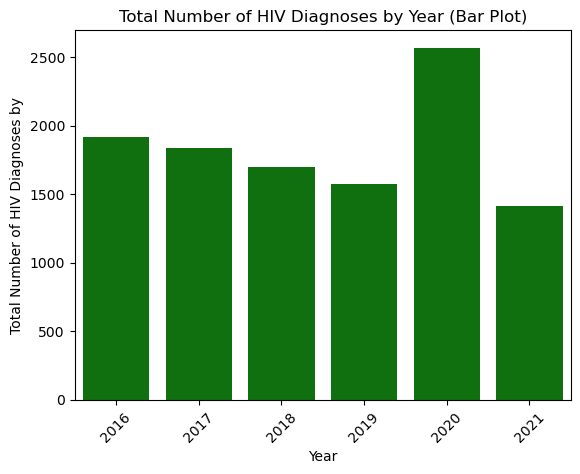

In [88]:
#Create Bar plotfor yearly accurances
sns.barplot(x=yearly_hiv_counts.index,y=yearly_hiv_counts.values,color='green')
plt.title('Total Number of HIV Diagnoses by Year (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Total Number of HIV Diagnoses by')
plt.xticks(rotation=45)

2020 stands out as the year with the highest occurence of events in the dataset. This observation suggests that 2020 experienced a notable frequency of events compared to other years, indicating a potential area of focus for further inverstigation 

The plot illustrating race occurence reveals that Black & Latin/Hispanic demonstrate the highest frequency of events in the dataset. This observation suggests differences in event occurances across different racial groups, emphasizing the need for further examinaion into potential underlying factors contributing to these differences.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '20 -\n29'),
  Text(1, 0, '30 -\n39'),
  Text(2, 0, '40 -\n49'),
  Text(3, 0, '50 -\n59'),
  Text(4, 0, '60+'),
  Text(5, 0, '13 -\n19')])

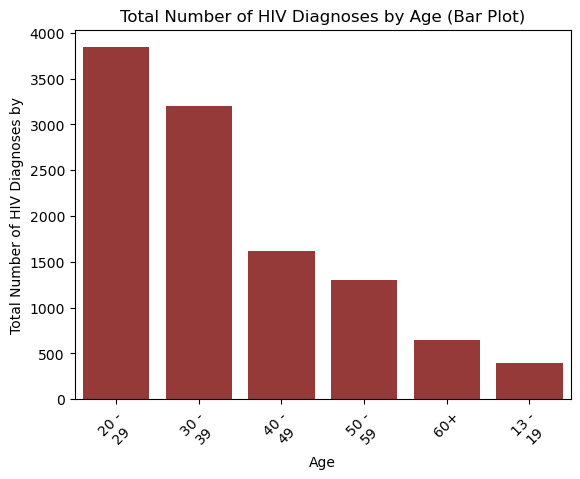

In [89]:
#Create Bar plot for Age accurence
sns.barplot(x=age_hiv_counts.index,y=age_hiv_counts.values,color='brown')
plt.title('Total Number of HIV Diagnoses by Age (Bar Plot)')
plt.xlabel('Age')
plt.ylabel('Total Number of HIV Diagnoses by')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten\nIsland')])

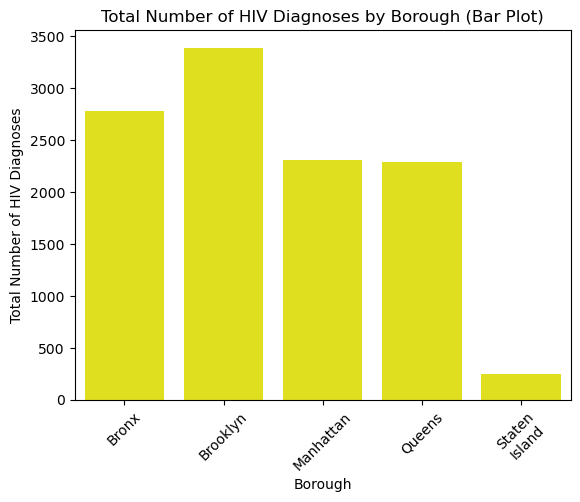

In [90]:
#Create Bar plot for Borough accurence
sns.barplot(x=borough_hiv_counts.index,y=borough_hiv_counts.values,color='yellow')
plt.title('Total Number of HIV Diagnoses by Borough (Bar Plot)')
plt.xlabel('Borough')
plt.ylabel('Total Number of HIV Diagnoses')
plt.xticks(rotation=45)

The analysis of occurence counts by age group indicates that individuals aged 20-29 and 30-39 demonstrate the highest frequency of events in the dataset

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Asian/Pacific\nIslander'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Latino/Hispanic'),
  Text(3, 0, 'Other/Unknown'),
  Text(4, 0, 'White')])

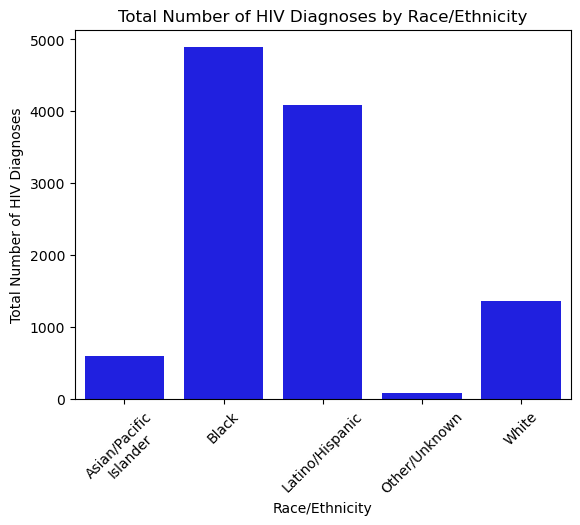

In [77]:
#Create Bar plot for race/ethnicity and count of 'total number of HIV diagnoses'
sns.barplot(x=race_hiv_diagnoses.index,y=race_hiv_diagnoses.values,color='blue')
plt.title('Total Number of HIV Diagnoses by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total Number of HIV Diagnoses')
plt.xticks(rotation=45)

# Conclusion Statement

In summary, our anaylsis highlights a notable increase in HIV diagnoses, particularly in 2020, which could be linked to the COVID-19 outbreak.The disruptions caused by the pandemic, such as limited access to healthcare services, decreased testing and prevention efforts, and increased social and economic hardships, may have contributed to the spike in HIV rates period. Black and Hispanic individuals, along with young adults aged 20-29 and 30-39, were disportionately affected. These findings emphasize the importance of addressing the intersecting challenges of COVID-19 and HIV, as well as the need for targeted interventions and support services to mitigate the impact on vulnerable populations. By addressing these challenges comprehensively, we can work towards reducing the burden of HIV and prompting better health outcomes for all.